# MODELO  NO SUPERVISADO 

Para esta entrega se usa un dataset distinto, debido a que nos encontramos con limitaciones computacionales para correr los algoritmos en el dataset sobre el que veníamos trabajando.

In [1]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [85]:
p1 = pd.read_csv('..\\datasets\\WineQT.csv')

In [86]:
p1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [87]:
# Se verifica que no hayan valores nulos
p1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [88]:
# Se verifica el tipo de dato de cada columna
p1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [113]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np. arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(p1)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

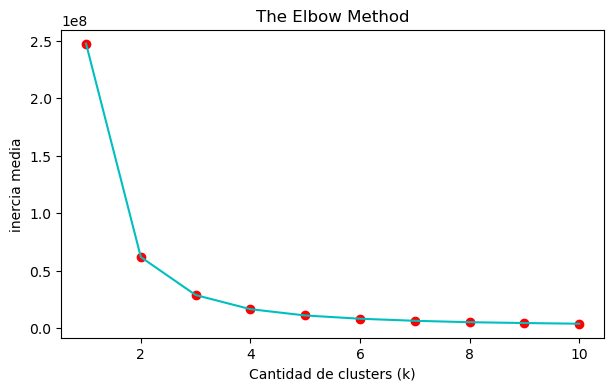

In [114]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

Se observa que el grafico arroja un numero de clusters entre 2 y , que es el punto en donde comienza a disminuir bruscamente (punto de quiebre) la variación.


In [109]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(p1)


KMeans(n_clusters=2, random_state=0)

In [110]:
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)


array([0, 1])

In [111]:
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(p1)

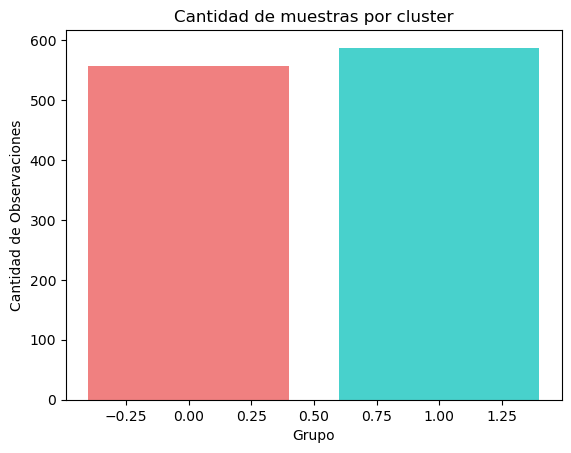

In [112]:
#Se verifica la cantidad de observaciones
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


In [115]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(p1)


KMeans(n_clusters=3, random_state=0)

In [116]:
# Etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)


array([0, 1, 2])

In [117]:
# Se hace la predicción:
y_means3=kmeansmodel3.fit_predict(p1)

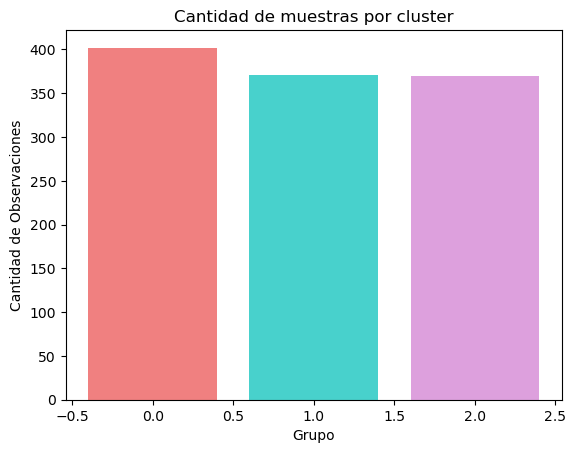

In [118]:
#Se verifica la cantidad de observaciones
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


Se puede observar que la cantidad de muestras es bastante equitativa para cada cluster

In [97]:
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[7.73381295e+00 5.20809353e-01 2.37985612e-01 2.43120504e+00
  8.24748201e-02 1.67176259e+01 4.20530576e+01 9.95806601e-01
  3.33805755e+00 6.43938849e-01 1.07628297e+01 5.75539568e+00
  1.21897302e+03]
 [8.85792164e+00 5.41311755e-01 2.97137990e-01 2.62776831e+00
  9.11550256e-02 1.45715503e+01 4.95724020e+01 9.97605434e-01
  3.28540034e+00 6.70749574e-01 1.01383305e+01 5.56388416e+00
  4.12829642e+02]]


In [120]:
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[7.58610422e+00 5.36116625e-01 2.32084367e-01 2.44106700e+00
  8.24317618e-02 1.67096774e+01 4.35124069e+01 9.95745335e-01
  3.33585608e+00 6.45161290e-01 1.07142266e+01 5.70719603e+00
  1.32527047e+03]
 [8.62648649e+00 5.23351351e-01 2.67783784e-01 2.53459459e+00
  8.72648649e-02 1.52216216e+01 4.48918919e+01 9.97062135e-01
  3.30432432e+00 6.29783784e-01 1.04135135e+01 5.62162162e+00
  7.81621622e+02]
 [8.78540541e+00 5.34121622e-01 3.08459459e-01 2.62891892e+00
  9.15027027e-02 1.48175676e+01 4.95540541e+01 9.97471622e-01
  3.29064865e+00 6.99297297e-01 1.01743243e+01 5.63783784e+00
  2.61610811e+02]]


In [119]:
# Convierte el DataFrame en un arreglo de NumPy
x= pd.DataFrame(datos_scaled) 
x = datos_scaled[:, [8, 10]]

In [15]:
#Se seleccionan las variables
columnas_seleccionadas = [8, 10]
x_subset = datos_scaled[:, columnas_seleccionadas]

In [20]:
# Se verifica como performan
p1 = [x_subset]
df = pd.DataFrame(p1, columns=['X', 'Y'])
df['Cluster'] = etiquetas_1
sns.scatterplot(x='X', y='Y', hue='Cluster', p1=df, palette='pastel2')
plt.scatter(centroides[:, 0], centroides[:, 1], c='green', marker='x', s=200, label='Centroids1')
plt.title('Distribución de Clusters y Centroides')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

ValueError: Must pass 2-d input. shape=(1, 1143, 2)

In [19]:
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], hue=kmeansmodel.labels_, palette='pastel2')
plt.scatter(centroides1[:, 0], centroides1[:, 1], c='green', marker='x', s=200, label='Centroids')
plt.title('Datos y Centroides')
plt.legend()
plt.show()

NameError: name 'x1' is not defined

In [21]:
# Se evalua con la suma de los cuadrados de las distancias (SSD)
SSD= kmeansmodel.inertia_
print( "SSD: ",SSD)

SSD:  28673443.10210178


cuanto debe dar?


In [22]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(datos_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(datos_scaled, labels, metric='euclidean'))

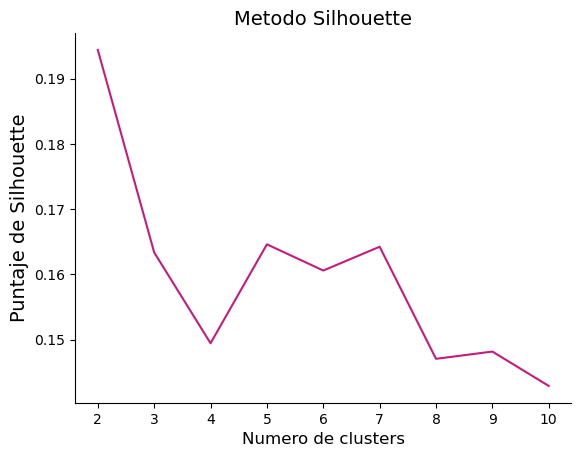

In [23]:
# Se grafica
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

Se debe considerar el coeficiente de silhoutte más cercano a 1, por lo que se reagruparán en 2 cluster. 

In [782]:
###ver si dos cluster está bien!!